In [79]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [80]:
df=pd.read_csv('file:///F:/haberman.csv')


In [81]:
df.shape

(305, 4)

In [82]:
df.isnull().sum()

age                     0
year_of_treatment       0
positive_lymph_nodes    0
survival_5yr\t          0
dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   age                   305 non-null    int64
 1   year_of_treatment     305 non-null    int64
 2   positive_lymph_nodes  305 non-null    int64
 3   survival_5yr	         305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [84]:
df.head()

age  year_of_treatment  positive_lymph_nodes  survival_5yr\t
0   30                 62                     3               1
1   30                 65                     0               1
2   31                 59                     2               1
3   31                 65                     4               1
4   33                 58                    10               1

In [85]:
df['survival_5yr\t'].value_counts()

1    224
2     81
Name: survival_5yr\t, dtype: int64

In [86]:
df.describe().T

count       mean        std   min   25%   50%   75%  \
age                   305.0  52.531148  10.744024  30.0  44.0  52.0  61.0   
year_of_treatment     305.0  62.849180   3.254078  58.0  60.0  63.0  66.0   
positive_lymph_nodes  305.0   4.036066   7.199370   0.0   0.0   1.0   4.0   
survival_5yr\t        305.0   1.265574   0.442364   1.0   1.0   1.0   2.0   

                       max  
age                   83.0  
year_of_treatment     69.0  
positive_lymph_nodes  52.0  
survival_5yr\t         2.0

In [87]:
df['survival_5yr\t'].replace(to_replace = 1, value ="yes", inplace = True)
df['survival_5yr\t'].replace(to_replace=2,value="no",inplace=True)
df['survival_5yr\t'].value_counts()

yes    224
no      81
Name: survival_5yr\t, dtype: int64

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


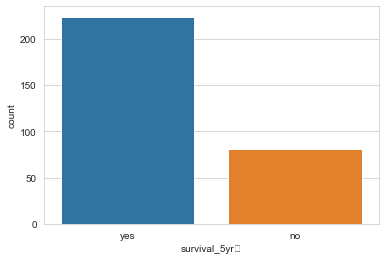

In [88]:
sns.countplot(df['survival_5yr\t'])

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


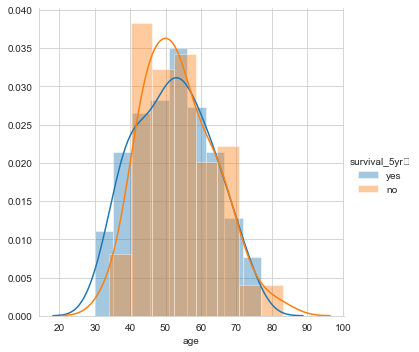

In [89]:
sns.FacetGrid(df, hue = 'survival_5yr\t',height=5, ).map(sns.distplot, "age").add_legend()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


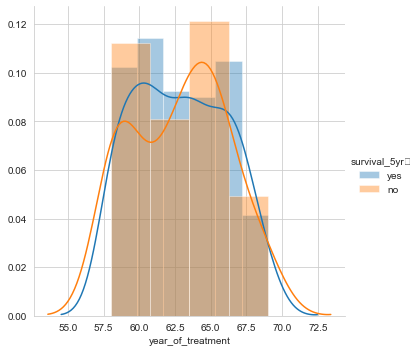

In [90]:
sns.FacetGrid(df,hue='survival_5yr\t',height=5,).map(sns.distplot,'year_of_treatment').add_legend()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


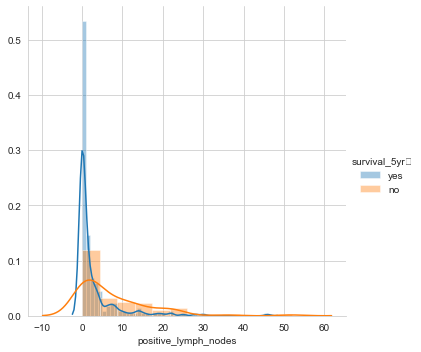

In [91]:
sns.FacetGrid(df,hue='survival_5yr\t',height=5,).map(sns.distplot,'positive_lymph_nodes').add_legend()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


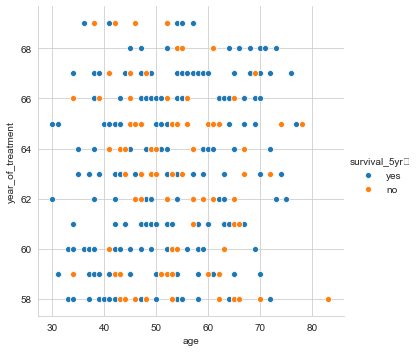

In [92]:
sns.FacetGrid(df,hue='survival_5yr\t',height=5,).map(sns.scatterplot,'age','year_of_treatment').add_legend()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


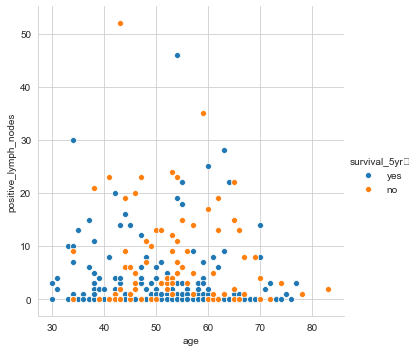

In [93]:
sns.FacetGrid(df,hue='survival_5yr\t',height=5,).map(sns.scatterplot,'age','positive_lymph_nodes').add_legend()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


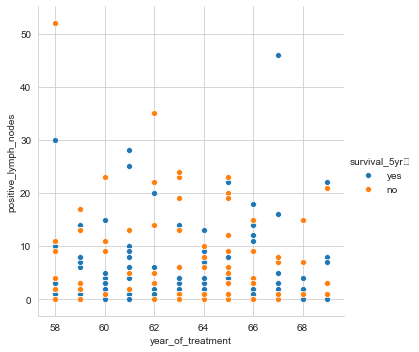

In [94]:
sns.FacetGrid(df,hue='survival_5yr\t',height=5,).map(sns.scatterplot,'year_of_treatment', 'positive_lymph_nodes').add_legend()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


(<seaborn.axisgrid.PairGrid at 0x2749e9cb5c8>, None)

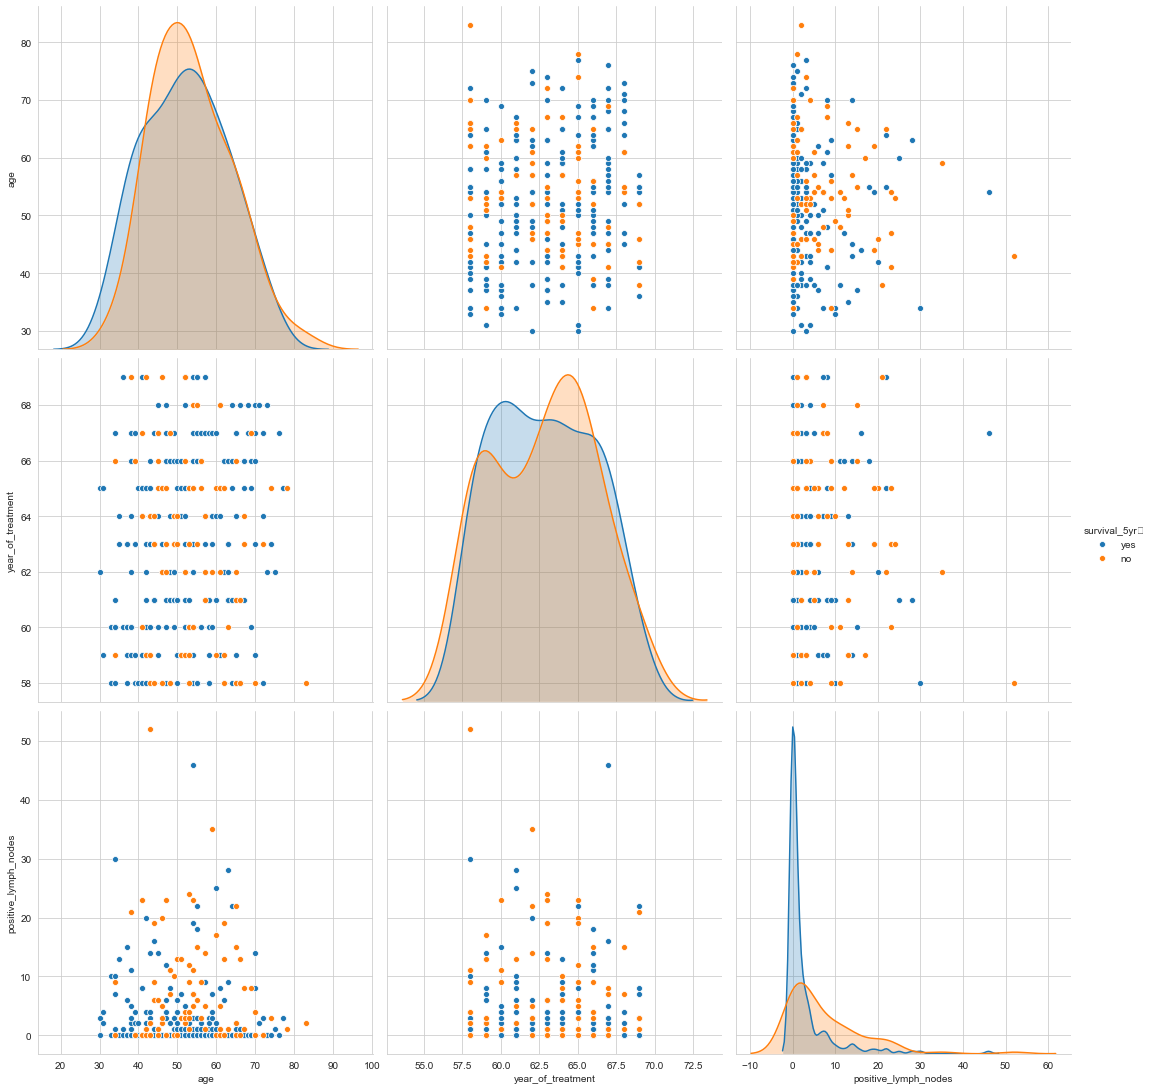

In [95]:
sns.pairplot(df,hue='survival_5yr\t',height=5,),sns.set_style('whitegrid')

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


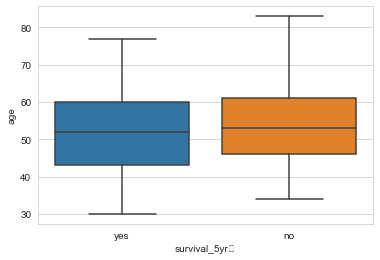

In [96]:
sns.boxplot(x='survival_5yr\t',y = 'age', data = df)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


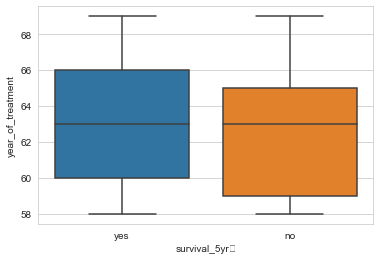

In [97]:
sns.boxplot(x='survival_5yr\t',y = 'year_of_treatment', data = df)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


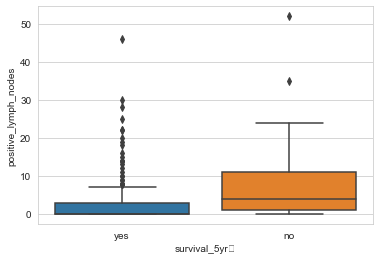

In [98]:
sns.boxplot(x='survival_5yr\t',y = 'positive_lymph_nodes', data = df)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


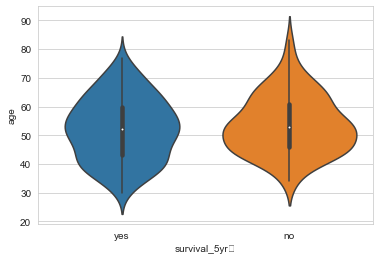

In [99]:
sns.violinplot(x='survival_5yr\t',y = 'age', data = df, size =8)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


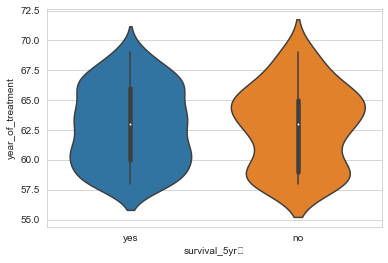

In [100]:
sns.violinplot(x = 'survival_5yr\t', y = 'year_of_treatment', data = df)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


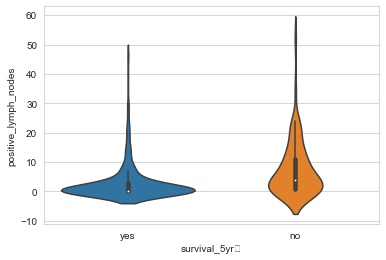

In [101]:
sns.violinplot(x = 'survival_5yr\t', y = 'positive_lymph_nodes', data = df)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'hue'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


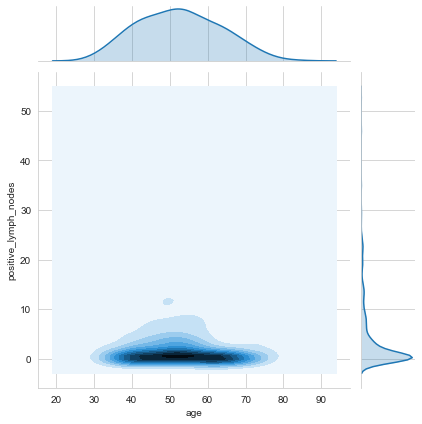

In [102]:
sns.jointplot(x = 'age', y =  'positive_lymph_nodes', data = df, hue = 'survival_5yr\t', kind = 'kde')

In [103]:
df.head()

age  year_of_treatment  positive_lymph_nodes survival_5yr\t
0   30                 62                     3            yes
1   30                 65                     0            yes
2   31                 59                     2            yes
3   31                 65                     4            yes
4   33                 58                    10            yes

In [104]:
df.shape

(305, 4)

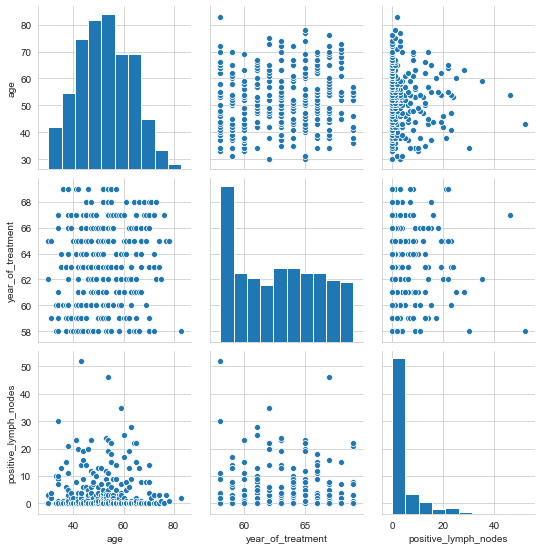

In [105]:
sns.pairplot(df,palette='bwr')

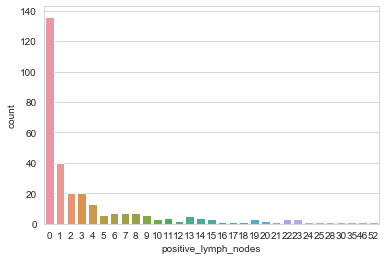

In [106]:
sns.countplot(df['positive_lymph_nodes'])

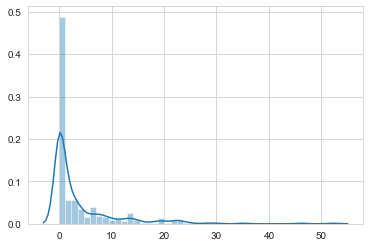

In [108]:
sns.distplot(df[['positive_lymph_nodes']])

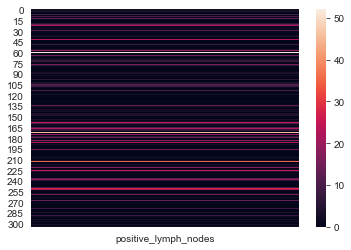

In [110]:
sns.heatmap(df[['positive_lymph_nodes']])

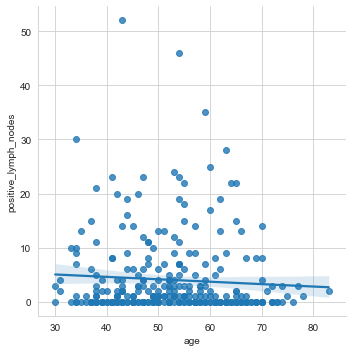

In [111]:
sns.lmplot(x = 'age', y =  'positive_lymph_nodes', data = df,palette='plasma')

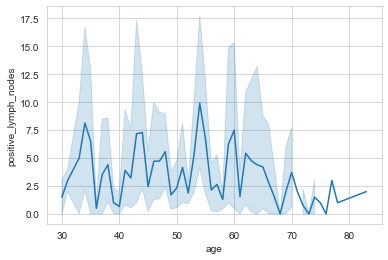

In [112]:
sns.lineplot(x = 'age', y =  'positive_lymph_nodes', data = df,palette='plasma')

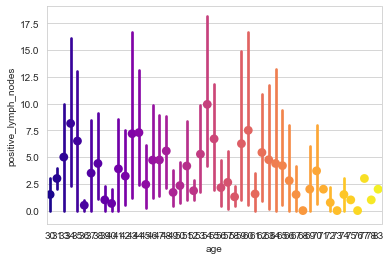

In [113]:
sns.pointplot(x = 'age', y =  'positive_lymph_nodes', data = df,palette='plasma')

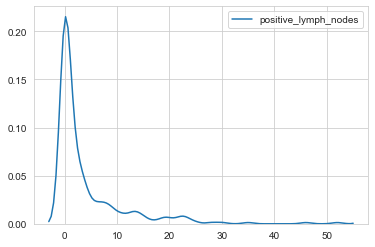

In [118]:
sns.kdeplot(df['positive_lymph_nodes'])

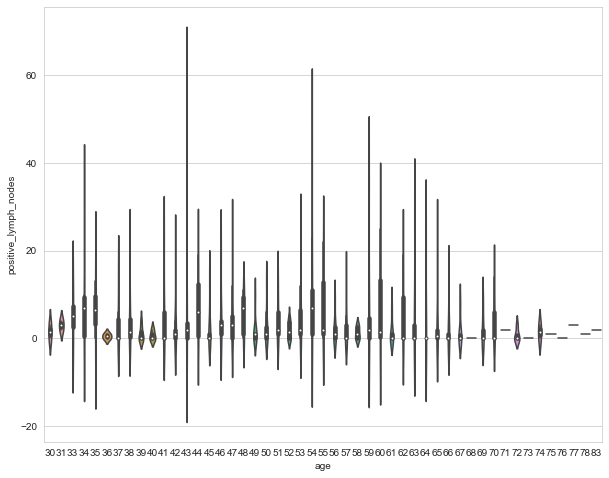

In [122]:
plt.figure(figsize=(10,8))
sns.violinplot(x = 'age', y =  'positive_lymph_nodes', data = df)

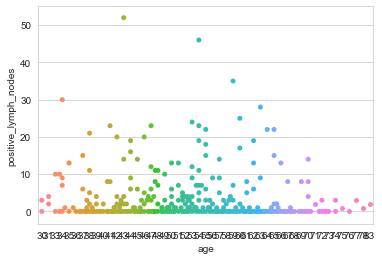

In [125]:
sns.swarmplot(x = 'age', y =  'positive_lymph_nodes', data = df)

In [126]:
df.head()

age  year_of_treatment  positive_lymph_nodes survival_5yr\t
0   30                 62                     3            yes
1   30                 65                     0            yes
2   31                 59                     2            yes
3   31                 65                     4            yes
4   33                 58                    10            yes

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [128]:
x=df.age.values
y=df.positive_lymph_nodes.values

In [133]:
x=x.reshape(-1,1)

In [134]:
y=y.reshape(-1,1)

In [135]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [136]:
xtrain.shape

(213, 1)

In [137]:
ytrain.shape

(213, 1)

In [139]:
li=LogisticRegression()
li.fit(xtrain,ytrain)
pre_li=li.predict(xtest)
accu_li=accuracy_score(ytest,pre_li)
accu_li

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.41304347826086957

In [140]:
print(classification_report(ytest,pre_li))

              precision    recall  f1-score   support

           0       0.41      1.00      0.58        38
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pre_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pre_rnd)
accu_rnd

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.30434782608695654

In [143]:
print(classification_report(ytest,pre_rnd))

              precision    recall  f1-score   support

           0       0.44      0.61      0.51        38
           1       0.25      0.21      0.23        14
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         8
           4       0.10      0.50      0.17         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.11      0.50      0.18         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [144]:
from sklearn.naive_bayes import MultinomialNB

In [145]:
mnb=MultinomialNB()
mnb.fit(xtrain,ytrain)
pre_mnb=mnb.predict(xtest)
accu_mnb=accuracy_score(ytest,pre_mnb)
accu_mnb

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.41304347826086957

In [146]:
print(classification_report(ytest,pre_mnb))

              precision    recall  f1-score   support

           0       0.41      1.00      0.58        38
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
from sklearn.naive_bayes import GaussianNB

In [148]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
pre_gnb=gnb.predict(xtest)
accu_gnb=accuracy_score(ytest,pre_gnb)
accu_gnb

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.30434782608695654

In [149]:
print(classification_report(ytest,pre_gnb))

              precision    recall  f1-score   support

           0       0.43      0.74      0.54        38
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          20       0.00    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [150]:
from sklearn.svm import SVC

In [151]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytest,pre_svc)
accu_svc

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.41304347826086957

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
rnb=RandomForestClassifier()
rnb.fit(xtrain,ytrain)
pre_rnb=rnb.predict(xtest)
accu_rnb=accuracy_score(ytest,pre_rnb)
accu_rnb

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.31521739130434784

In [155]:
df.head()

age  year_of_treatment  positive_lymph_nodes survival_5yr\t
0   30                 62                     3            yes
1   30                 65                     0            yes
2   31                 59                     2            yes
3   31                 65                     4            yes
4   33                 58                    10            yes

In [154]:
from sklearn.preprocessing import LabelEncoder

In [156]:
le=LabelEncoder()


In [158]:
df['survival_5yr\t']=le.fit_transform(df['survival_5yr\t'])

In [159]:
df.head()

age  year_of_treatment  positive_lymph_nodes  survival_5yr\t
0   30                 62                     3               1
1   30                 65                     0               1
2   31                 59                     2               1
3   31                 65                     4               1
4   33                 58                    10               1

In [160]:
import sweetviz as sv

In [161]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [162]:
from IPython.display import IFrame

In [163]:
IFrame(src='Analyze.html',width=1000,height=600)

In [164]:
from dataprep.eda import *

  0%|          | 0/573 [00:00<?, ?it/s]

DataPrep Report
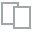
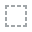
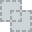
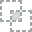
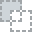
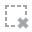
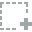
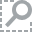
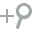
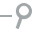
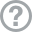
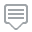
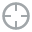
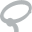
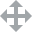
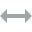
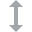
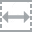
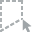
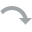
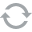
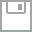
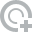
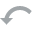
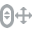
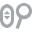
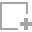
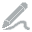
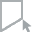
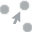
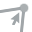
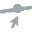

In [165]:
create_report(df)

In [166]:
from sklearn.preprocessing import MinMaxScaler

In [168]:
df.columns

Index(['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_5yr\t'], dtype='object')

In [169]:
men=MinMaxScaler()
feat=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_5yr\t']
df[feat]=men.fit_transform(df[feat])
df[feat]

age  year_of_treatment  positive_lymph_nodes  survival_5yr\t
0    0.000000           0.363636              0.057692             1.0
1    0.000000           0.636364              0.000000             1.0
2    0.018868           0.090909              0.038462             1.0
3    0.018868           0.636364              0.076923             1.0
4    0.056604           0.000000              0.192308             1.0
..        ...                ...                   ...             ...
300  0.849057           0.363636              0.019231             1.0
301  0.867925           0.818182              0.000000             1.0
302  0.886792           0.636364              0.057692             1.0
303  0.905660           0.636364              0.019231             0.0
304  1.000000           0.000000              0.038462             0.0

[305 rows x 4 columns]

In [170]:
from sklearn.preprocessing import StandardScaler

In [171]:
std=StandardScaler()
feat=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_5yr\t']
df[feat]=std.fit_transform(df[feat])
df[feat]

age  year_of_treatment  positive_lymph_nodes  survival_5yr\t
0   -2.100533          -0.261388             -0.144147        0.601338
1   -2.100533           0.662048             -0.561535        0.601338
2   -2.007305          -1.184823             -0.283276        0.601338
3   -2.007305           0.662048             -0.005018        0.601338
4   -1.820849          -1.492635              0.829758        0.601338
..        ...                ...                   ...             ...
300  2.094725          -0.261388             -0.422406        0.601338
301  2.187953           1.277671             -0.561535        0.601338
302  2.281181           0.662048             -0.144147        0.601338
303  2.374409           0.662048             -0.422406       -1.662959
304  2.840549          -1.492635             -0.283276       -1.662959

[305 rows x 4 columns]